# Coupled ODEs

This example demonstrates basic functionality for solving a system of coupled ODEs; in this the [Lotka–Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) equations.

This example is available as a Jupyter notebook [here](https://github.com/patrick-kidger/diffrax/blob/main/examples/coupled_odes.ipynb).

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, SaveAt, Tsit5


def vector_field(t, y, args):
    prey, predator = y
    α, β, γ, δ = args
    d_prey = α * prey - β * prey * predator
    d_predator = -γ * predator + δ * prey * predator
    d_y = d_prey, d_predator
    return d_y


term = ODETerm(vector_field)
solver = Tsit5()
t0 = 0
t1 = 140
dt0 = 0.1
y0 = (10.0, 10.0)
args = (0.1, 0.02, 0.4, 0.02)
saveat = SaveAt(ts=jnp.linspace(t0, t1, 1000))
sol = diffeqsolve(term, solver, t0, t1, dt0, y0, args=args, saveat=saveat)

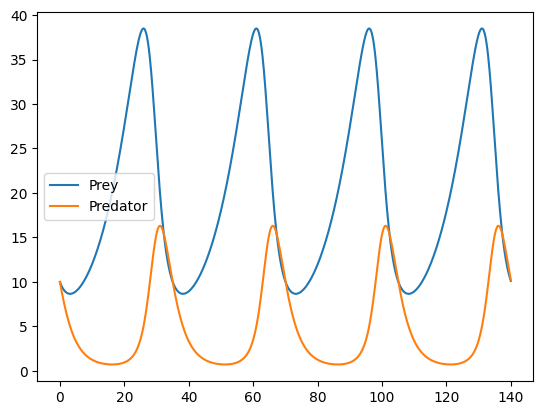

In [2]:
plt.plot(sol.ts, sol.ys[0], label="Prey")
plt.plot(sol.ts, sol.ys[1], label="Predator")
plt.legend()
plt.show()